# Interpolacja 

### Zadanie 1
Stablicuj następujące funkcje: sqrt(x), sin(x), x^3+2x w czterech punktach należących do przedziału 0 do 10.

In [7]:
import math
import numpy as np
from tabulate import tabulate


def to_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max+step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    # print(tabulate(table, headers=["x", func_name], tablefmt="grid", floatfmt=".10f"))
    return x_values, y_values, tabulate(table, headers=["x", func_name], tablefmt="grid",
                                        floatfmt=".10f")


print(to_table(0, 10, 3, math.sqrt, "sqrt(x)")[2])
print(to_table(0, 10, 3, math.sin, "sin(x)")[2])
f = lambda x: x**3 + 2*x
print(to_table(0, 10, 3, f, "x^3 + 2x")[2])

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  3.3333333333 | -0.1905679629 |
+---------------+---------------+
|  6.6666666667 |  0.3741512306 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  3.3333333333 |   43.7037037037 |
+---------------+-----------------+
|  6.666666

### Zadanie 2 
Napisz algorytm znajdujący wielomian interpolujący Lagrange dla powyższych stablicowanych funkcji.

In [10]:
import sympy as sp


def lagrange_polynomial(x_values, y_values):
    if len(x_values) != len(y_values):
        exit("There must be exact same number of x and y values")
        return -1
    x = sp.symbols('x')
    y = 0
    for k in range(len(x_values)):
        i = 1
        for j in range(len(x_values)):
            if j != k:
                i = i*((x - x_values[j]) / (x_values[k] - x_values[j]))
        y += i*y_values[k]
    return sp.simplify(y)


x_arr, y_arr, _ = to_table(0, 10, 3, math.sqrt, "sqrt(x)")
print("Lagrange polynomial for sqrt(x):", lagrange_polynomial(x_arr, y_arr), "\n")

x_arr, y_arr, _ = to_table(0, 10, 3, math.sin, "sin(x)")
print("Lagrange polynomial for sqrt(x):", lagrange_polynomial(x_arr, y_arr), "\n")

f = lambda x: x**3 + 2*x
x_arr, y_arr, _ = to_table(0, 10, 3, f, "x^3 + 2x")
print("Lagrange polynomial for sqrt(x):", lagrange_polynomial(x_arr, y_arr), "\n")

Lagrange polynomial for sqrt(x): x*(0.00402091444262344*x**2 - 0.0883364112915617*x + 0.797500434670112) 

Lagrange polynomial for sqrt(x): x*(-0.0100718041105327*x**2 + 0.134705963139825*x - 0.394281331433923) 

Lagrange polynomial for sqrt(x): x*(1.0*x**2 - 7.105427357601e-15*x + 2.0) 



### Zadanie 3
Porównaj wartość dokładną z wynikiem interpolacji dla punktów znajdujących się pomiędzy węzłami wielomianu (w połowie odległości) interpolującego. Oszacuj dokładność interpolacji. 


+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.6666666667 | 1.2909944487 |               1.1024038155 |     0.1460816764 |     0.1885906332 |
+--------------+--------------+----------------------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 |               2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+------------

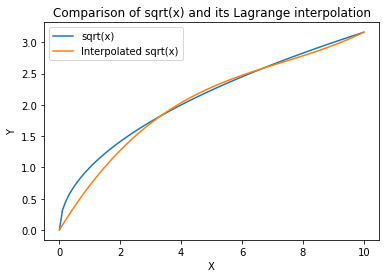

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  3.3333333333 | -0.1905679629 |
+---------------+---------------+
|  6.6666666667 |  0.3741512306 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.6666666667 |  0.9954079578 |             -0.3295810442 |     1.3311014761 |     1.3249890019 |
+--------------+---------------+---------------------------+------------------+------------------+
| 5.0000000000 | -0.9589242747 |              0.1372669075 |    -1.1431467647 |     1.0961911822 |
+--------------+---------------+

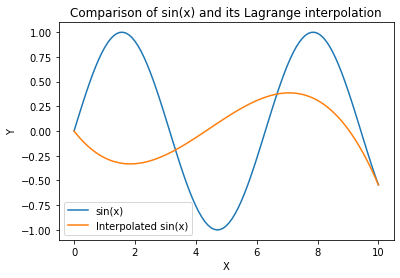

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  3.3333333333 |   43.7037037037 |
+---------------+-----------------+
|  6.6666666667 |  309.6296296296 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.6666666667 |   7.9629629630 |                7.9629629630 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 5.0000000000 | 135.0000000000 |              135.0000000000 |     0.0000000000 |     0.00000

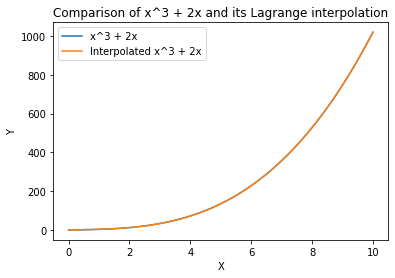

In [14]:
import matplotlib.pyplot as plt


def lagrange_interpolation(x_values, y_values, x):
    if len(x_values) != len(y_values):
        exit("There must be exact same number of x and y values")
        return -1
    y = 0
    for k in range(len(x_values)):
        i = 1
        for j in range(len(x_values)):
            if j != k:
                i = i * ((x - x_values[j]) / (x_values[k] - x_values[j]))
        y += i * y_values[k]
    return sp.simplify(y)


def to_chart(min, max, number_of_points, fun1, fun2, fun_name):
    x_axis = []
    f1_values = []
    f2_values = []
    step = (max - min) / number_of_points
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))
        f2_values.append(fun2(x))

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Interpolated "+fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Comparison of "+fun_name+" and its Lagrange interpolation")
    plt.legend()
    plt.show()


def cmp_inbetween_points(min, max, number_of_points, fun1, fun2, fun_name):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min+(step/2), max+(step/2), step):
        table.append([x, fun1(x), fun2(x), abs(fun1(x) - fun2(x)) / fun1(x),
                      abs(fun1(x) - fun2(x))])
    print(tabulate(table, headers=["x", fun_name, "Interpolation of "+fun_name,
                                   "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))


x_sqrt, y_sqrt, sqrt_tab = to_table(0, 10, 3, math.sqrt, "sqrt(x)")
x_sin, y_sin, sin_tab = to_table(0, 10, 3, math.sin, "sin(x)")
f = lambda x: x**3 + 2*x
x_f, y_f, f_tab = to_table(0, 10, 3, f, "x^3 + 2x")

sqrt_approx = lambda x: lagrange_interpolation(x_sqrt, y_sqrt, x)
sin_approx = lambda x: lagrange_interpolation(x_sin, y_sin, x)
f_approx = lambda x: lagrange_interpolation(x_f, y_f, x)

print(sqrt_tab)
cmp_inbetween_points(0, 10, 3, math.sqrt, sqrt_approx, "sqrt(x)")
to_chart(0, 10, 100, math.sqrt, sqrt_approx, "sqrt(x)")

print(sin_tab)
cmp_inbetween_points(0, 10, 3, math.sin, sin_approx, "sin(x)")
to_chart(0, 10, 100, math.sin, sin_approx, "sin(x)")

print(f_tab)
cmp_inbetween_points(0, 10, 3, f, f_approx, "x^3 + 2x")
to_chart(0, 10, 100, f, f_approx, "x^3 + 2x")

### Zadanie 4
Powtórz powyższe kroki dla 3, 5 i 8 węzłów interpolacji - podsumuj badania. 

In [16]:
def comparison(min, max, n):
    x_sqrt, y_sqrt, sqrt_tab = to_table(min, max, n, math.sqrt, "sqrt(x)")
    x_sin, y_sin, sin_tab = to_table(min, max, n, math.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f, f_tab = to_table(min, max, n, f, "x^3 + 2x")

    sqrt_approx = lambda x: lagrange_interpolation(x_sqrt, y_sqrt, x)
    sin_approx = lambda x: lagrange_interpolation(x_sin, y_sin, x)
    f_approx = lambda x: lagrange_interpolation(x_f, y_f, x)

    print(sqrt_tab)
    cmp_inbetween_points(min, max, n, math.sqrt, sqrt_approx, "sqrt(x)")
    to_chart(min, max, 1000, math.sqrt, sqrt_approx, "sqrt(x)")

    print(sin_tab)
    cmp_inbetween_points(min, max, n, math.sin, sin_approx, "sin(x)")
    to_chart(min, max, 1000, math.sin, sin_approx, "sin(x)")

    print(f_tab)
    cmp_inbetween_points(min, max, n, f, f_approx, "x^3 + 2x")
    to_chart(min, max, 1000, f, f_approx, "x^3 + 2x")

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |               1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |               2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+----------------------------+------------------+------------------+


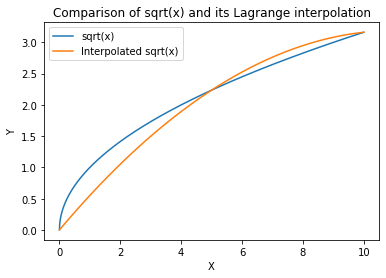

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+--------------+---------------------------+------------------+------------------+
|            x |       sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+==============+===========================+==================+==================+
| 2.5000000000 | 0.5984721441 |             -0.6511905671 |     2.0880883489 |     1.2496627112 |
+--------------+--------------+---------------------------+------------------+------------------+
| 7.5000000000 | 0.9379999768 |             -0.9232011226 |     1.9842229696 |     1.8612010994 |
+--------------+--------------+---------------------------+------------------+------------------+


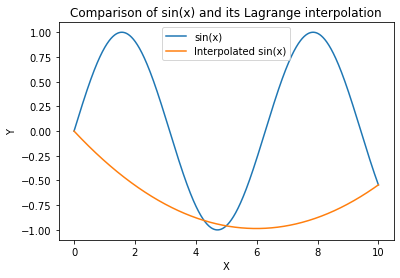

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 2.5000000000 |  20.6250000000 |              -26.2500000000 |     2.2727272727 |    46.8750000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 7.5000000000 | 436.8750000000 |              483.7500000000 |     0.1072961373 |    46.8750000000 |
+--------------+----------------+-----------------------------+-

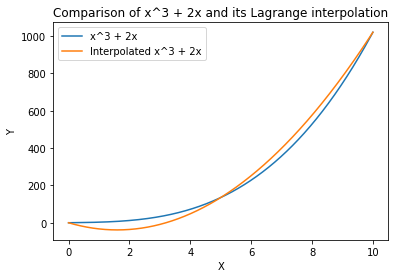

In [17]:
comparison(0, 10, 2)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.2500000000 | 1.1180339887 |               0.9820659964 |     0.1216134695 |     0.1359679924 |
+--------------+--------------+----------------------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 |               1.9596017579 |     0.011933996

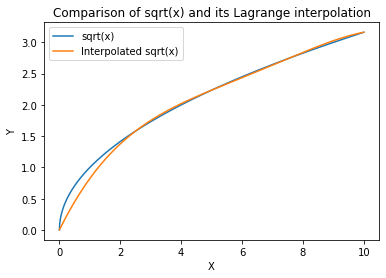

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  2.5000000000 |  0.5984721441 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
|  7.5000000000 |  0.9379999768 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.2500000000 |  0.9489846194 |              1.4054289399 |     0.4809817896 |     0.4564443205 |
+--------------+---------------+---------------------------+------------------+------------------+
| 3.7500000000 | -0.5715613187 |             -0.5530228042 |   

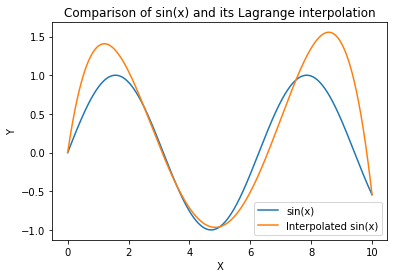

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  2.5000000000 |   20.6250000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
|  7.5000000000 |  436.8750000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.2500000000 |   4.4531250000 |                4.4531250000 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 3.7500000000 |  60.2

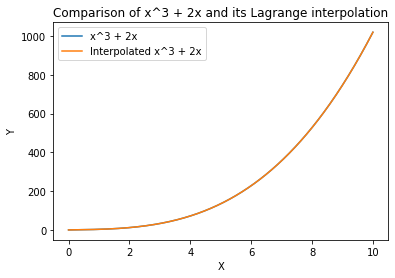

In [18]:
comparison(0, 10, 4)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.2500000000 | 1.1180339887 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  3.7500000000 | 1.9364916731 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  6.2500000000 | 2.5000000000 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
|  8.7500000000 | 2.9580398915 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 0.625000

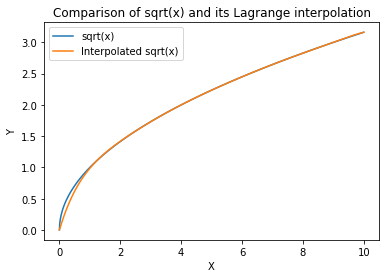

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  1.2500000000 |  0.9489846194 |
+---------------+---------------+
|  2.5000000000 |  0.5984721441 |
+---------------+---------------+
|  3.7500000000 | -0.5715613187 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
|  6.2500000000 | -0.0331792165 |
+---------------+---------------+
|  7.5000000000 |  0.9379999768 |
+---------------+---------------+
|  8.7500000000 |  0.6247239538 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+=========

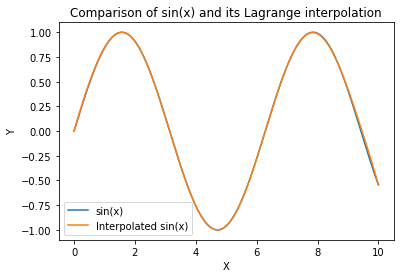

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  1.2500000000 |    4.4531250000 |
+---------------+-----------------+
|  2.5000000000 |   20.6250000000 |
+---------------+-----------------+
|  3.7500000000 |   60.2343750000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
|  6.2500000000 |  256.6406250000 |
+---------------+-----------------+
|  7.5000000000 |  436.8750000000 |
+---------------+-----------------+
|  8.7500000000 |  687.4218750000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=======

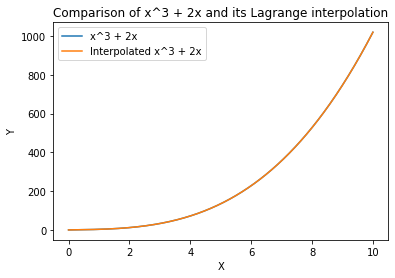

In [19]:
comparison(0, 10, 8)

## Wnioski
Na podstawie powyższych obserwacji można wyciągnąć wniosek, że dokładność przybliżenia za pomocą interpolacji Lagrange'a rośnie wraz ze wzrostem liczby węzłów tejże interpolacji. Jest to logiczne, ponieważ im więcej punktów mamy tym łatwiej jest nam odtworzyć wykres poprzez, kolokwialnie rzecz ujmując, ich połączenie. Widać to również poprzez stopniowo malejący błąd względny i bezwględny dla kolejnych interpolacji.